# OCP - Open/Closed Principle

**Klasy powinny być otwarte na rozszerzenia, ale zamknięte na modyfikacje.**

Innymi słowy: **Dodawaj nowe funkcje przez dziedziczenie, nie przez edycję istniejącego kodu.**

## Złe rozwiązanie - łamie OCP

Mamy system rabatowy. Każdy nowy typ rabatu wymaga **modyfikacji** klasy.

In [13]:
class DiscountCalculator:
    def calculate(self, customer_type, price):
        if customer_type == "regular":
            return price * 0.95  # 5% rabatu
        elif customer_type == "premium":
            return price * 0.90  # 10% rabatu
        elif customer_type == "vip":
            return price * 0.80  # 20% rabatu
        # Nowy typ? Musisz EDYTOWAĆ tę metodę!
        return price


In [14]:
# client code
calc = DiscountCalculator()
print(f"Regular (100 zł): {calc.calculate('regular', 100)} zł")
print(f"Premium (100 zł): {calc.calculate('premium', 100)} zł")
print(f"VIP (100 zł): {calc.calculate('vip', 100)} zł")


Regular (100 zł): 95.0 zł
Premium (100 zł): 90.0 zł
VIP (100 zł): 80.0 zł


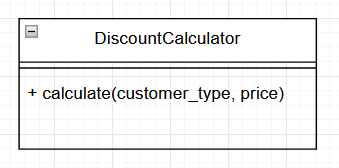

### Problem:

Chcesz dodać nowy typ klienta "student"?

```python
def calculate(self, customer_type, price):
    if customer_type == "regular":
        return price * 0.95
    elif customer_type == "premium":
        return price * 0.90
    elif customer_type == "vip":
        return price * 0.80
    elif customer_type == "student":  # ← EDYTUJESZ działający kod!
        return price * 0.85
    return price
```

**Ryzyko:** Zepsujesz działający kod, trzeba retestować całość.

## Dobre rozwiązanie - zgodne z OCP

Nowy typ klienta = **nowa klasa**, nie edycja starej.

**Ogólna zasada**: Po zidentyfikowaniu zmieniającego się framgnetu kodu, wyodrębniamy go i przerabiamy w taki sposób, żeby każdy przypadek miał odpowiadający mu komponent (klasę). W ten sposób **hermetyzujemy zmianę**. 

In [6]:
# Klasa bazowa (interfejs)
# TODO: interfejs
from abc import ABC, abstractmethod


class Discount(ABC):
    @abstractmethod
    def calculate(self, price: float) -> float:
        ...


In [7]:
# Konkretne rabaty
# TODO: implementacje

class RegularDiscount(Discount):
    def calculate(self, price) -> float:
        return  price * 0.95


class PremiumDiscount(Discount):
    def calculate(self, price) -> float:
        return  price * 0.9


class VipDiscount(Discount):
    def calculate(self, price) -> float:
        return  price * 0.8

In [15]:
# client code
# TODO: użycie

regular = RegularDiscount()
print(regular.calculate(100))


def context_function(price: float, discount: Discount) -> None:
    print(discount.calculate(price))

95.0


In [16]:
context_function(100, regular)

95.0


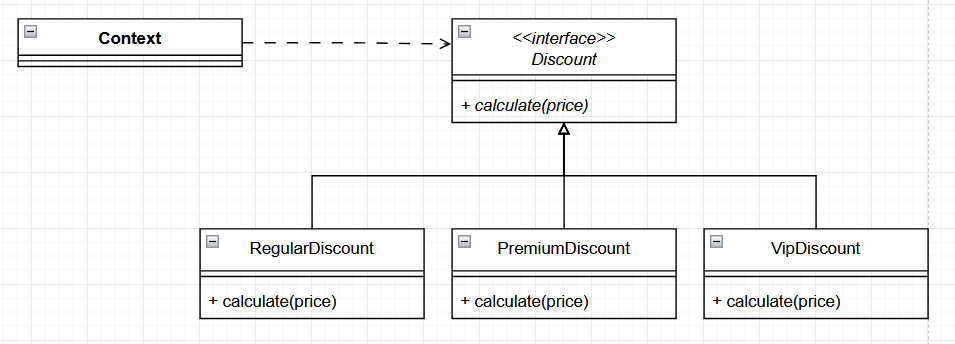

### Dodanie nowego typu - tylko rozszerzenie!

In [18]:
# Nowy typ klienta - NOWA KLASA (nie edytujesz starych!)
class StudentDiscount(Discount):
    def calculate(self, price):
        return price * 0.85  # 15%


In [19]:
# client code
# Nowy kod działa - OTWARTY NA ROZBUDOWĘ
student = StudentDiscount()
print(f"\nStudent (100 zł): {student.calculate(100)} zł")

# Stare kod NIE ZMIENIONY - ZAMKNIĘTY NA MODYFIKACJĘ
print(f"Regular nadal działa: {regular.calculate(100)} zł")


Student (100 zł): 85.0 zł
Regular nadal działa: 95.0 zł


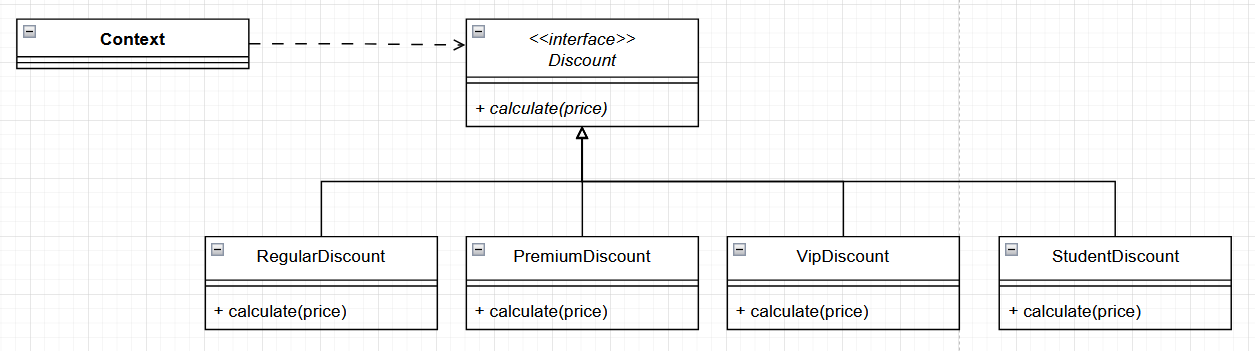

## 📊 Porównanie

| Aspekt | Złe (if/elif) | Dobre (dziedziczenie) |
|--------|------------------|---------------------------|
| Nowy typ klienta | Edytuj `calculate()` | Dodaj nową klasę |
| Ryzyko | Zepsucie starego kodu | Zero - nie dotykasz starego |
| Testowanie | Retestuj wszystko | Testuj tylko nową klasę |
| Modyfikacja | TAK | NIE |
| Rozszerzenie | Trudne | Łatwe |

## Esencja OCP

### Pytanie:
Jak dodać nową funkcjonalność?

### Złe (łamie OCP):
```python
# Edytujesz istniejącą klasę
class Calculator:
    def calculate(self, type, price):
        if type == "new_type":  # ← DODAJESZ do if/elif
            ...
```

### Dobre (zgodne z OCP):
```python
# Dodajesz nową klasę (nie edytujesz starych)
class NewTypeDiscount(Discount):  # ← NOWA KLASA
    def calculate(self, price):
        ...
```

---

### Kluczowa różnica:

**Zamknięte na modyfikacje** = nie edytujesz istniejących klas  
**Otwarte na rozszerzenia** = dodajesz nowe klasy dziedziczące

## Inne przykłady OCP

### Płatności
```python
class Payment:
    def process(self): ...

class CreditCardPayment(Payment): ...  # nowa klasa
class PayPalPayment(Payment): ...      # nowa klasa
class BitcoinPayment(Payment): ...     # nowa klasa
```

### Eksport danych
```python
class Exporter:
    def export(self, data): ...

class CSVExporter(Exporter): ...   # nowa klasa
class JSONExporter(Exporter): ...  # nowa klasa
class XMLExporter(Exporter): ...   # nowa klasa
```

### Powiadomienia
```python
class Notifier:
    def send(self, message): ...

class EmailNotifier(Notifier): ...  # nowa klasa
class SMSNotifier(Notifier): ...    # nowa klasa
class SlackNotifier(Notifier): ...  # nowa klasa
```

## Podsumowanie

### OCP w jednym zdaniu:
**Dodawaj funkcje przez nowe klasy, nie przez edycję starych.**

### Jak rozpoznać łamanie OCP?
- Widzisz długi `if/elif` dla różnych typów → łamie OCP
- Każda nowa opcja wymaga edycji tej samej klasy → łamie OCP

### Jak naprawić?
1. Stwórz klasę bazową (interfejs)
2. Każdy typ = osobna klasa dziedzicząca
3. Nowa funkcja = nowa klasa (nie edytujesz starych)